# 2603655_DataAcquisition

## Week2 20240813

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

In [7]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("pandas version :",pd.__version__)
print("numpy version :",np.__version__)
print("matplotlib version :",mpl.__version__)
print("seaborn version :",sns.__version__)

pandas version : 2.2.1
numpy version : 1.26.4
matplotlib version : 3.8.4
seaborn version : 0.13.2


In [8]:
df = pd.read_csv('data/thaiglobal_logistics_data_rev2.csv')
df.info()
print()
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   shipment_id              100000 non-null  int64  
 1   date                     100000 non-null  object 
 2   origin                   100000 non-null  object 
 3   destination              100000 non-null  object 
 4   distance_km              100000 non-null  float64
 5   weight_kg                100000 non-null  float64
 6   vehicle_type             100000 non-null  object 
 7   vehicle_age_years        100000 non-null  float64
 8   driver_id                100000 non-null  int64  
 9   customer_id              100000 non-null  int64  
 10  product_type             100000 non-null  object 
 11  delivery_status          100000 non-null  object 
 12  delay_hours              100000 non-null  float64
 13  transport_cost           100000 non-null  float64
 14  reven

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   shipment_id              100000 non-null  int64         
 1   date                     100000 non-null  datetime64[ns]
 2   origin                   100000 non-null  object        
 3   destination              100000 non-null  object        
 4   distance_km              100000 non-null  float64       
 5   weight_kg                100000 non-null  float64       
 6   vehicle_type             100000 non-null  object        
 7   vehicle_age_years        100000 non-null  float64       
 8   driver_id                100000 non-null  int64         
 9   customer_id              100000 non-null  int64         
 10  product_type             100000 non-null  object        
 11  delivery_status          100000 non-null  object        
 12  delay_hours      

In [10]:
df.sample(5)

,shipment_id,date,origin,destination,distance_km,weight_kg,vehicle_type,vehicle_age_years,driver_id,customer_id,...,delivery_status,delay_hours,transport_cost,revenue,customer_satisfaction,fuel_consumption_liters,maintenance_cost,month,estimated_delivery_days,actual_delivery_days
84197,84198,2023-10-24,Phuket,London,5977.41,710.15,Airplane,0.9,105,3766,...,On Time,0.00,13054.05,18621.08,4.72,1494.35,277.06,10,12.5,12.50000
22308,22309,2022-08-27,Phuket,New York,1825.64,548.64,Van,6.1,314,8368,...,Delayed,12.33,2488.53,2917.34,3.15,228.20,1341.16,8,3.6,4.11375
73329,73330,2023-03-03,Chiang Mai,Dubai,2023.19,933.40,Truck,1.5,311,8154,...,On Time,0.00,2742.70,3554.46,4.24,337.20,284.76,3,3.8,3.80000
9890,9891,2022-09-06,Khon Kaen,Sydney,7991.94,626.40,Airplane,1.9,276,3587,...,On Time,0.00,26830.79,33815.35,4.84,1997.98,943.46,9,16.0,16.00000
53212,53213,2022-03-19,Khon Kaen,Singapore,9638.46,1315.97,Ship,3.6,57,177,...,On Time,0.00,12963.25,19148.03,4.45,642.56,733.98,3,19.3,19.30000


In [11]:
# monthly profit

monthly_account =  df.groupby(df['date'].dt.to_period('M')).agg({
                'revenue': 'sum',
                'transport_cost': 'sum'    
                })
monthly_account.head(3)

,revenue,transport_cost
date,,
2022-01,64505893.21,5.946697e+07
2022-02,56953176.98,4.388651e+07
2022-03,61959106.92,4.765455e+07


In [12]:
monthly_account['profit']=monthly_account['revenue']-monthly_account['transport_cost']
monthly_account.sample(5)
monthly_account.reset_index(inplace=True)  # return index to data
monthly_account.head(3)

,date,revenue,transport_cost,profit
0,2022-01,64505893.21,5.946697e+07,5.038928e+06
1,2022-02,56953176.98,4.388651e+07,1.306667e+07
2,2022-03,61959106.92,4.765455e+07,1.430456e+07


In [13]:
# incorrect datatype
monthly_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   date            24 non-null     period[M]
 1   revenue         24 non-null     float64  
 2   transport_cost  24 non-null     float64  
 3   profit          24 non-null     float64  
dtypes: float64(3), period[M](1)
memory usage: 900.0 bytes


In [14]:
monthly_account['date']=monthly_account['date'].dt.to_timestamp()  # convert period[M]

In [15]:
monthly_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            24 non-null     datetime64[ns]
 1   revenue         24 non-null     float64       
 2   transport_cost  24 non-null     float64       
 3   profit          24 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 900.0 bytes


In [16]:
display(monthly_account.head())

,date,revenue,transport_cost,profit
0,2022-01-01,64505893.21,5.946697e+07,5.038928e+06
1,2022-02-01,56953176.98,4.388651e+07,1.306667e+07
2,2022-03-01,61959106.92,4.765455e+07,1.430456e+07
3,2022-04-01,60246340.15,4.621082e+07,1.403552e+07
4,2022-05-01,61202418.39,4.710198e+07,1.410044e+07


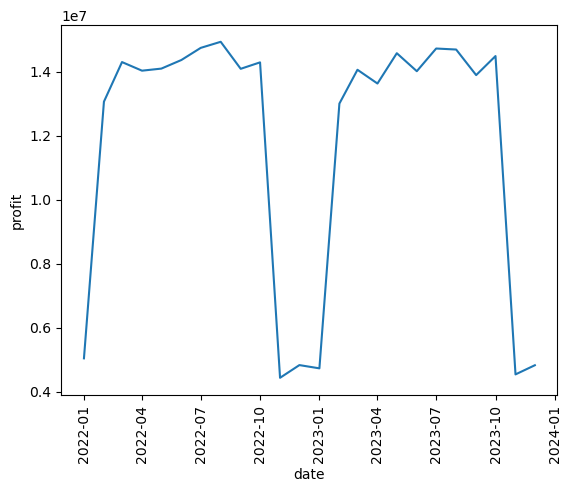

In [17]:
sns.lineplot(x='date', y='profit', data=monthly_account)
plt.xticks(rotation =90)
plt.show();

In [18]:
df_pivot = pd.pivot_table(df,
                        values= ['revenue'],
                        index= ['product_type'],
                        columns=['vehicle_type'],
                        aggfunc='mean'
                         )
display(df_pivot)

revenue                                         
vehicle_type      Airplane         Ship         Truck           Van
product_type                                                       
Chemicals     25086.184756  8410.889696  10047.015170  15007.327386
Clothing      25481.135423  8480.123260  10112.406903  15152.432217
Electronics   25484.015738  8464.738120   9866.680302  14946.345908
Food          25268.412850  8275.193262  10033.277017  15434.090581
Machinery     25212.967887  8517.525087  10066.952517  15136.138337

In [19]:
df_pivot = pd.pivot_table(df,
                        values= ['revenue','transport_cost'],
                        index= ['product_type'],
                        columns=['vehicle_type'],
                        aggfunc='mean'
                         )
display(df_pivot)

revenue                                           \
vehicle_type      Airplane         Ship         Truck           Van   
product_type                                                          
Chemicals     25086.184756  8410.889696  10047.015170  15007.327386   
Clothing      25481.135423  8480.123260  10112.406903  15152.432217   
Electronics   25484.015738  8464.738120   9866.680302  14946.345908   
Food          25268.412850  8275.193262  10033.277017  15434.090581   
Machinery     25212.967887  8517.525087  10066.952517  15136.138337   

             transport_cost                                          
vehicle_type       Airplane         Ship        Truck           Van  
product_type                                                         
Chemicals      20296.100733  6812.009689  8113.350972  12150.215326  
Clothing       20512.046665  6831.637215  8189.826214  12204.338072  
Electronics    20617.649567  6850.663683  7966.091188  12075.578572  
Food           20452.930575  6684.248932  8084.654159  12476.585687  
Machinery      20333.960100  6898.124275  8133.699055  12229.310567

### Split pivot table into x

In [21]:
idx = pd.IndexSlice
print(type(idx))
df_revenue = df_pivot.loc[:,idx['revenue']]
df_revenue

<class 'pandas.core.indexing._IndexSlice'>


vehicle_type,Airplane,Ship,Truck,Van
product_type,,,,
Chemicals,25086.184756,8410.889696,10047.015170,15007.327386
Clothing,25481.135423,8480.123260,10112.406903,15152.432217
Electronics,25484.015738,8464.738120,9866.680302,14946.345908
Food,25268.412850,8275.193262,10033.277017,15434.090581
Machinery,25212.967887,8517.525087,10066.952517,15136.138337


In [22]:
df_revenue_plot = df_revenue.reset_index()
df_revenue_plot

vehicle_type,product_type,Airplane,Ship,Truck,Van
0,Chemicals,25086.184756,8410.889696,10047.015170,15007.327386
1,Clothing,25481.135423,8480.123260,10112.406903,15152.432217
2,Electronics,25484.015738,8464.738120,9866.680302,14946.345908
3,Food,25268.412850,8275.193262,10033.277017,15434.090581
4,Machinery,25212.967887,8517.525087,10066.952517,15136.138337


In [23]:
df_revenue_plot = df_revenue_plot.melt(id_vars='product_type',var_name='vehicle_type',value_name='revenue')

In [24]:
df_revenue_plot.head()

,product_type,vehicle_type,revenue
0,Chemicals,Airplane,25086.184756
1,Clothing,Airplane,25481.135423
2,Electronics,Airplane,25484.015738
3,Food,Airplane,25268.412850
4,Machinery,Airplane,25212.967887


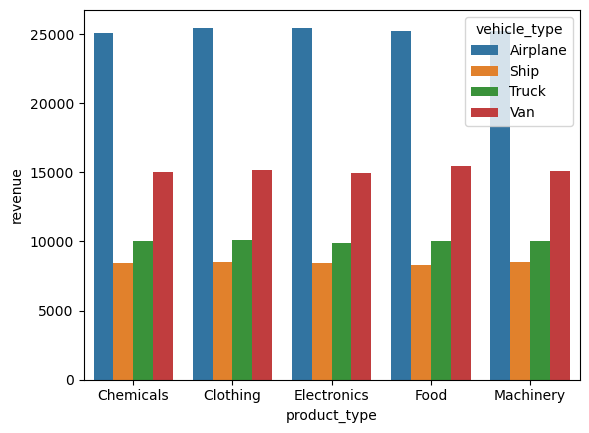

In [25]:
sns.barplot(x='product_type',y='revenue', hue='vehicle_type',data=df_revenue_plot)
plt.show();

In [26]:
# float64_columns = df.select_dtypes(include=['number']).columns
float64_columns = df.select_dtypes(include=['float64']).columns
float64_columns

Index(['distance_km', 'weight_kg', 'vehicle_age_years', 'delay_hours',
       'transport_cost', 'revenue', 'customer_satisfaction',
       'fuel_consumption_liters', 'maintenance_cost',
       'estimated_delivery_days', 'actual_delivery_days'],
      dtype='object')

### Descriptive Analysis: numerical

In [28]:
df_float64= df[float64_columns].copy()
df_float64.describe()

,distance_km,weight_kg,vehicle_age_years,delay_hours,transport_cost,revenue,customer_satisfaction,fuel_consumption_liters,maintenance_cost,estimated_delivery_days,actual_delivery_days
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5056.177089,499.856165,4.000002,4.311429,11920.787213,14755.357262,4.148388,769.858055,1351.788514,10.113554,10.293197
std,2858.384931,498.976837,2.827351,11.756899,10420.322537,12918.814306,0.814009,584.092110,1027.253772,5.737222,5.756020
min,100.020000,0.000000,0.000000,0.000000,73.540000,84.700000,1.000000,6.670000,16.520000,-1.500000,-1.500000
25%,2580.897500,144.067500,1.900000,0.000000,4505.447500,5564.860000,4.060000,312.835000,632.325000,5.200000,5.300000
50%,5054.525000,346.395000,3.400000,0.000000,8998.323000,11126.750000,4.370000,610.880000,1069.470000,10.100000,10.300000
75%,7530.455000,693.515000,5.400000,0.000000,15966.691500,19819.617500,4.690000,1117.332500,1769.747500,15.100000,15.200000
max,9999.790000,6065.410000,29.100000,71.990000,71965.800000,87872.730000,5.000000,2499.690000,11422.090000,21.500000,23.492917


In [29]:
df_float64.skew()

distance_km               -0.001926
weight_kg                  1.972593
vehicle_age_years          1.410813
delay_hours                3.507071
transport_cost             1.687783
revenue                    1.690532
customer_satisfaction     -1.676963
fuel_consumption_liters    0.947196
maintenance_cost           1.885022
estimated_delivery_days   -0.002103
actual_delivery_days       0.000644
dtype: float64

In [30]:
df_descriptive = df_float64.describe().T
df_descriptive

,count,mean,std,min,25%,50%,75%,max
distance_km,100000.0,5056.177089,2858.384931,100.02,2580.8975,5054.525,7530.4550,9999.790000
weight_kg,100000.0,499.856165,498.976837,0.00,144.0675,346.395,693.5150,6065.410000
vehicle_age_years,100000.0,4.000002,2.827351,0.00,1.9000,3.400,5.4000,29.100000
delay_hours,100000.0,4.311429,11.756899,0.00,0.0000,0.000,0.0000,71.990000
transport_cost,100000.0,11920.787213,10420.322537,73.54,4505.4475,8998.323,15966.6915,71965.800000
revenue,100000.0,14755.357262,12918.814306,84.70,5564.8600,11126.750,19819.6175,87872.730000
customer_satisfaction,100000.0,4.148388,0.814009,1.00,4.0600,4.370,4.6900,5.000000
fuel_consumption_liters,100000.0,769.858055,584.092110,6.67,312.8350,610.880,1117.3325,2499.690000
maintenance_cost,100000.0,1351.788514,1027.253772,16.52,632.3250,1069.470,1769.7475,11422.090000
estimated_delivery_days,100000.0,10.113554,5.737222,-1.50,5.2000,10.100,15.1000,21.500000


In [31]:
# conbine
df_descriptive['skew'] = df_float64.skew()
df_descriptive['kurtosis'] = df_float64.kurtosis()
df_descriptive

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
distance_km,100000.0,5056.177089,2858.384931,100.02,2580.8975,5054.525,7530.4550,9999.790000,-0.001926,-1.198613
weight_kg,100000.0,499.856165,498.976837,0.00,144.0675,346.395,693.5150,6065.410000,1.972593,5.762083
vehicle_age_years,100000.0,4.000002,2.827351,0.00,1.9000,3.400,5.4000,29.100000,1.410813,3.040891
delay_hours,100000.0,4.311429,11.756899,0.00,0.0000,0.000,0.0000,71.990000,3.507071,12.957184
transport_cost,100000.0,11920.787213,10420.322537,73.54,4505.4475,8998.323,15966.6915,71965.800000,1.687783,3.385469
revenue,100000.0,14755.357262,12918.814306,84.70,5564.8600,11126.750,19819.6175,87872.730000,1.690532,3.379613
customer_satisfaction,100000.0,4.148388,0.814009,1.00,4.0600,4.370,4.6900,5.000000,-1.676963,2.266631
fuel_consumption_liters,100000.0,769.858055,584.092110,6.67,312.8350,610.880,1117.3325,2499.690000,0.947196,0.254100
maintenance_cost,100000.0,1351.788514,1027.253772,16.52,632.3250,1069.470,1769.7475,11422.090000,1.885022,5.592121
estimated_delivery_days,100000.0,10.113554,5.737222,-1.50,5.2000,10.100,15.1000,21.500000,-0.002103,-1.181225


### Descriptive Analysis: categorical

In [33]:
str_columns = df.select_dtypes(include=['object']).columns
for col in str_columns:
    print(df[col].value_counts())

origin
Chiang Mai    20090
Khon Kaen     20064
Bangkok       20004
Phuket        19922
Pattaya       19920
Name: count, dtype: int64
destination
New York     16741
London       16706
Dubai        16681
Singapore    16669
Tokyo        16629
Sydney       16574
Name: count, dtype: int64
vehicle_type
Airplane    25228
Ship        24998
Van         24929
Truck       24845
Name: count, dtype: int64
product_type
Food           20208
Clothing       20100
Machinery      20078
Chemicals      19848
Electronics    19766
Name: count, dtype: int64
delivery_status
On Time         79946
Delayed         14948
Very Delayed     5106
Name: count, dtype: int64


In [34]:
from PIL import Image

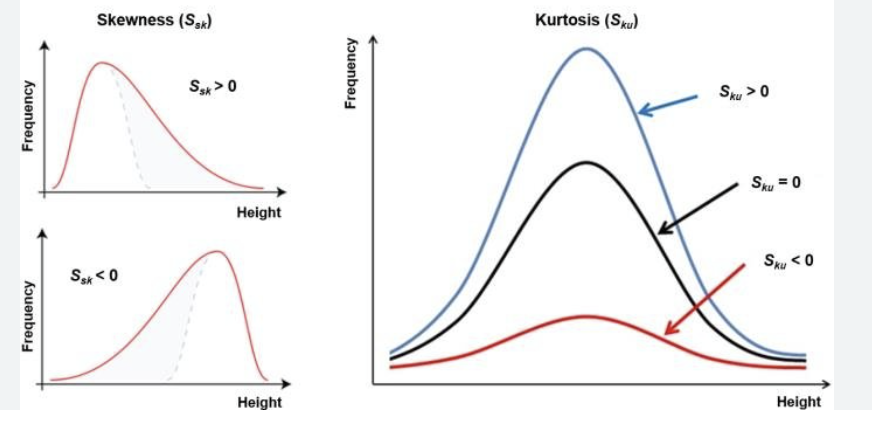

In [35]:
img = Image.open('figure/skew_kurtosis.png')
display(img)

## Graphical analysis

In [37]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [38]:
# darkgrid, whitegrid, dark, white, and ticks
sns.set_style('ticks')

In [39]:
plt.rcParams['figure.figsize']=(12,6)  # 1200*600

### Lineplot

In [41]:
monthly_account =  df.groupby(df['date'].dt.to_period('M')).agg({
                'revenue': 'sum',
                'transport_cost': 'sum'    
                })
monthly_account.reset_index(inplace=True)
monthly_account['date']=monthly_account['date'].dt.to_timestamp()  # convert period[M]

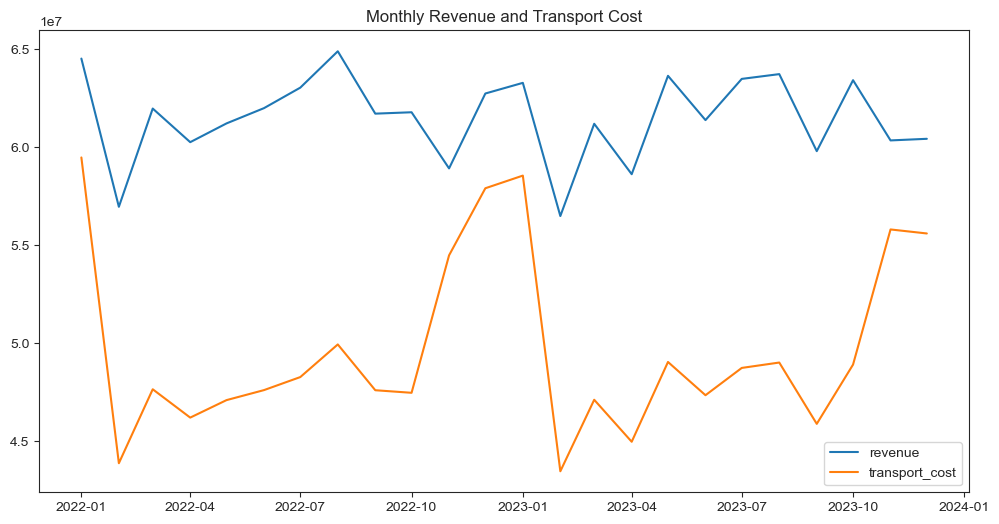

In [42]:
plt.plot(monthly_account['date'],monthly_account['revenue'],label='revenue')
plt.plot(monthly_account['date'],monthly_account['transport_cost'],label='transport_cost')
plt.title('Monthly Revenue and Transport Cost')
plt.legend()
plt.savefig('figure/monthly_trend.png')
plt.show()

### Scatter

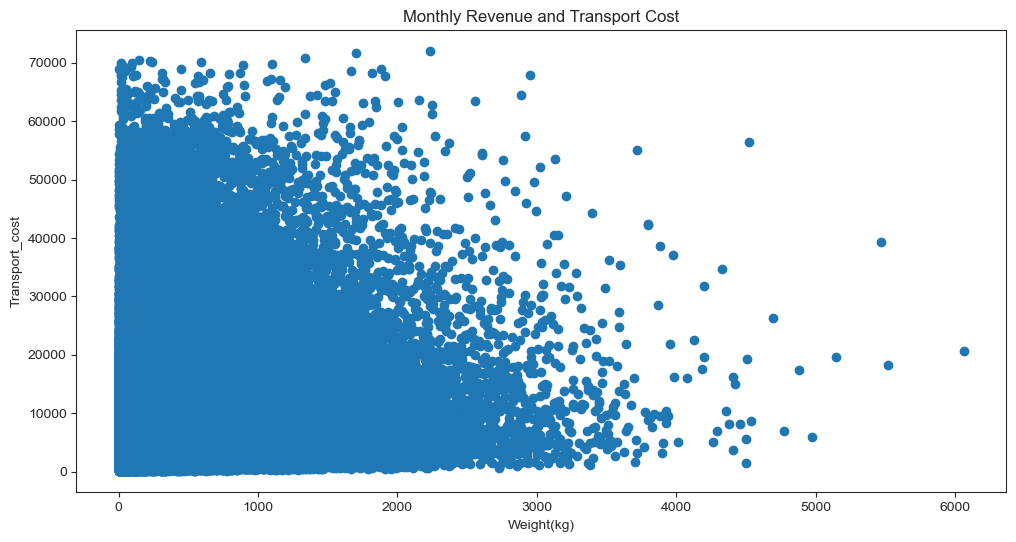

In [44]:
plt.scatter(x=df['weight_kg'],y=df['transport_cost'])
plt.xlabel('Weight(kg)')
plt.ylabel('Transport_cost')
plt.title('Monthly Revenue and Transport Cost')

plt.show();

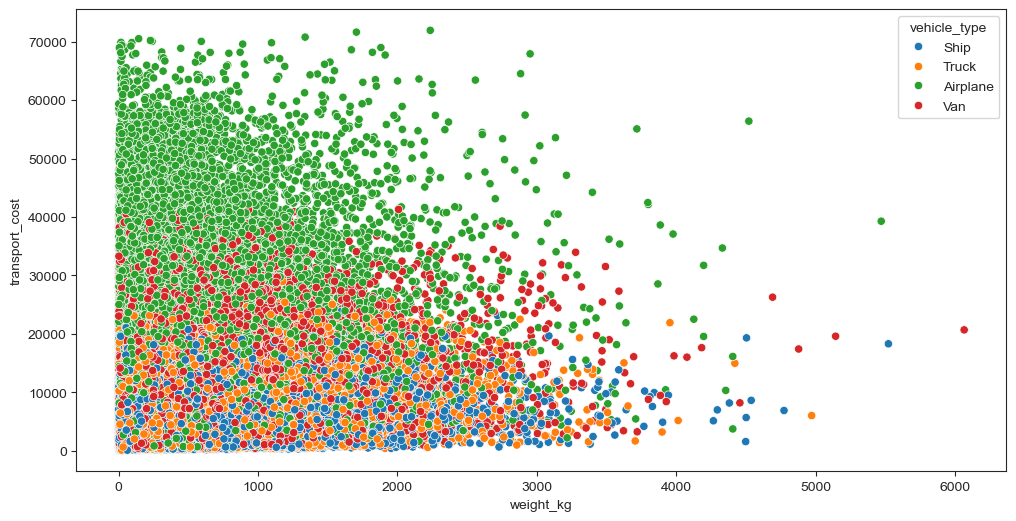

In [45]:
sns.scatterplot(x=df['weight_kg'],y=df['transport_cost'],hue=df['vehicle_type'])
plt.show();

### Histogram

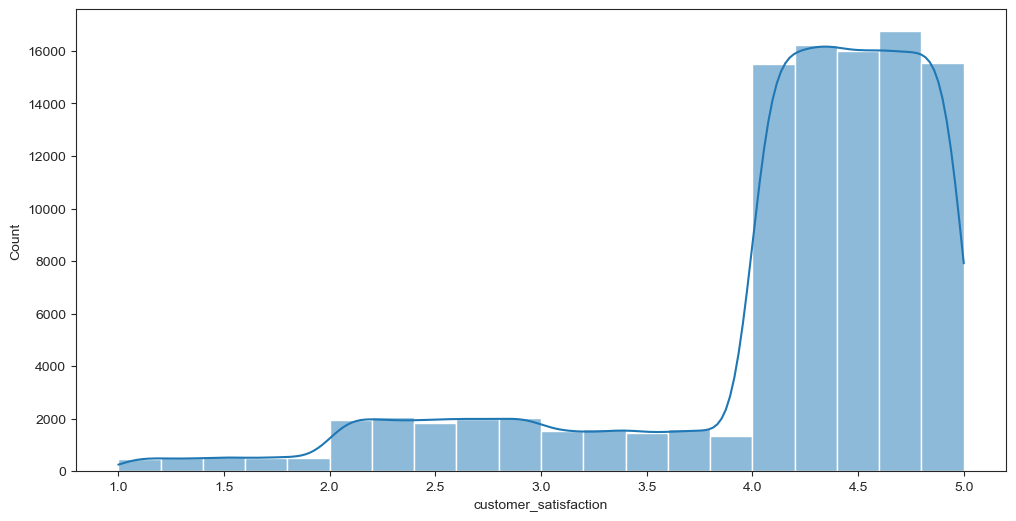

In [47]:
sns.histplot(df['customer_satisfaction'],bins=20,kde=True)
plt.show();

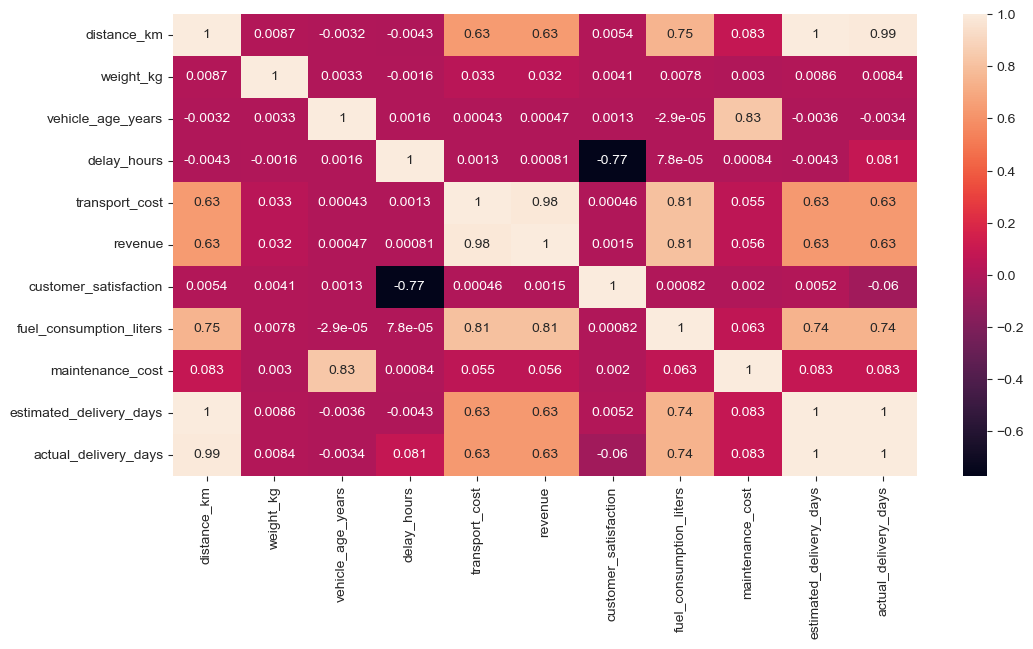

In [48]:
df_corr = df_float64.corr()
sns.heatmap(df_corr,annot=True)
plt.show();

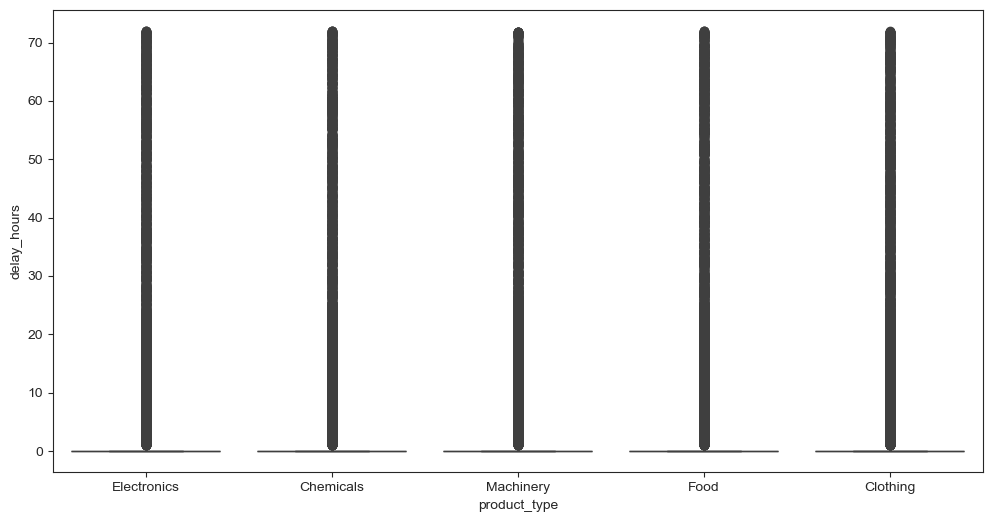

In [49]:
sns.boxplot(x='product_type',y='delay_hours',data=df)
plt.show();

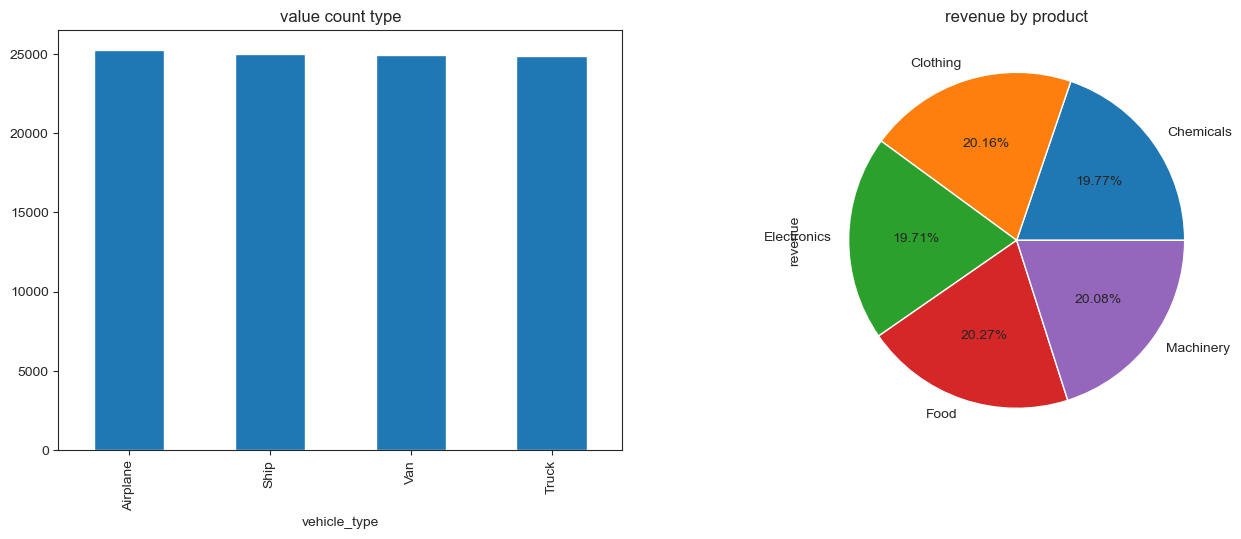

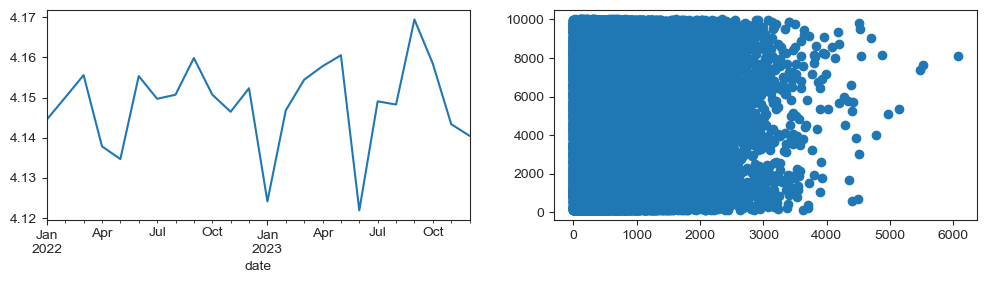

In [50]:
# plt.clf()
plt.figure(figsize=(16,12)) #width*height
plt.subplot(2,2,1) # (3,2)  row=3, column=2
df['vehicle_type'].value_counts().plot(kind='bar')
plt.title("value count type")

plt.subplot(2,2,2)
df.groupby(by=['product_type'])['revenue'].sum().plot(kind='pie',autopct= '%1.2f%%')
plt.title("revenue by product")
plt.show();

plt.subplot(2,2,3)
df.groupby(by=df['date'].dt.to_period('M'))['customer_satisfaction'].mean().plot(kind='line')   # skip step

plt.subplot(2,2,4)
# df.plot(x='weight_kg', y='distance_km',kind='scatter')
plt.scatter(x=df['weight_kg'], y=df['distance_km'])
plt.show();

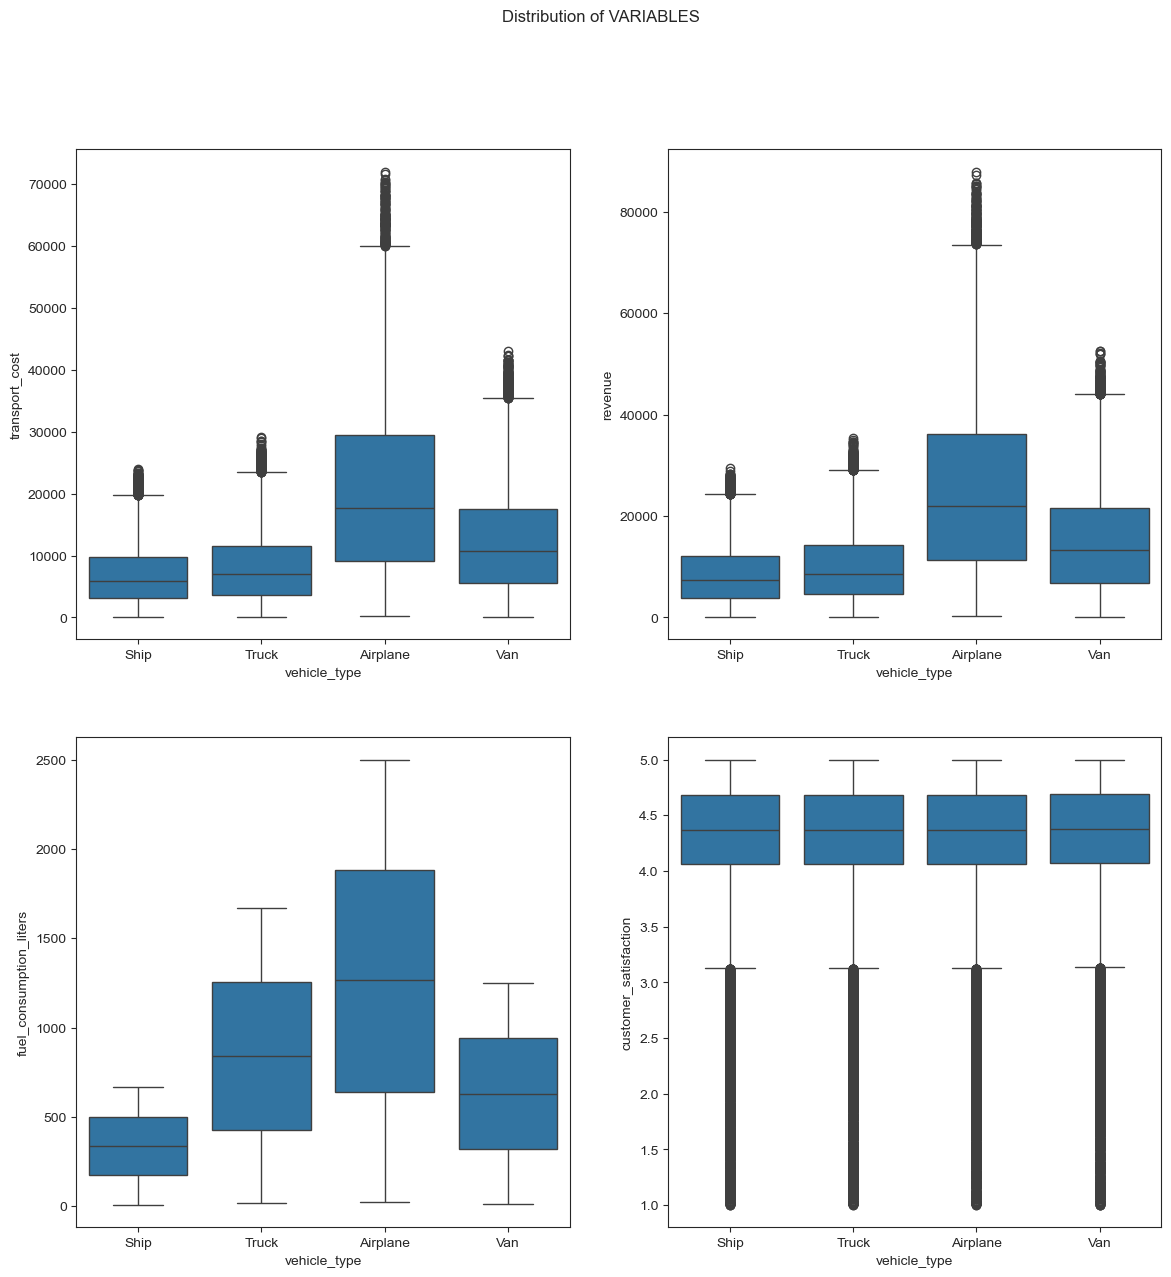

In [70]:
# plt.clf()
fig,axes = plt.subplots(2,2,figsize=(14,14))

var= ['transport_cost','revenue','fuel_consumption_liters','customer_satisfaction']

for i, var in enumerate(var):
    row = i // 2
    col = i % 2
    sns.boxplot(x='vehicle_type',y=var,ax=axes[row,col],data=df)
fig.suptitle('Distribution of VARIABLES')
plt.show();

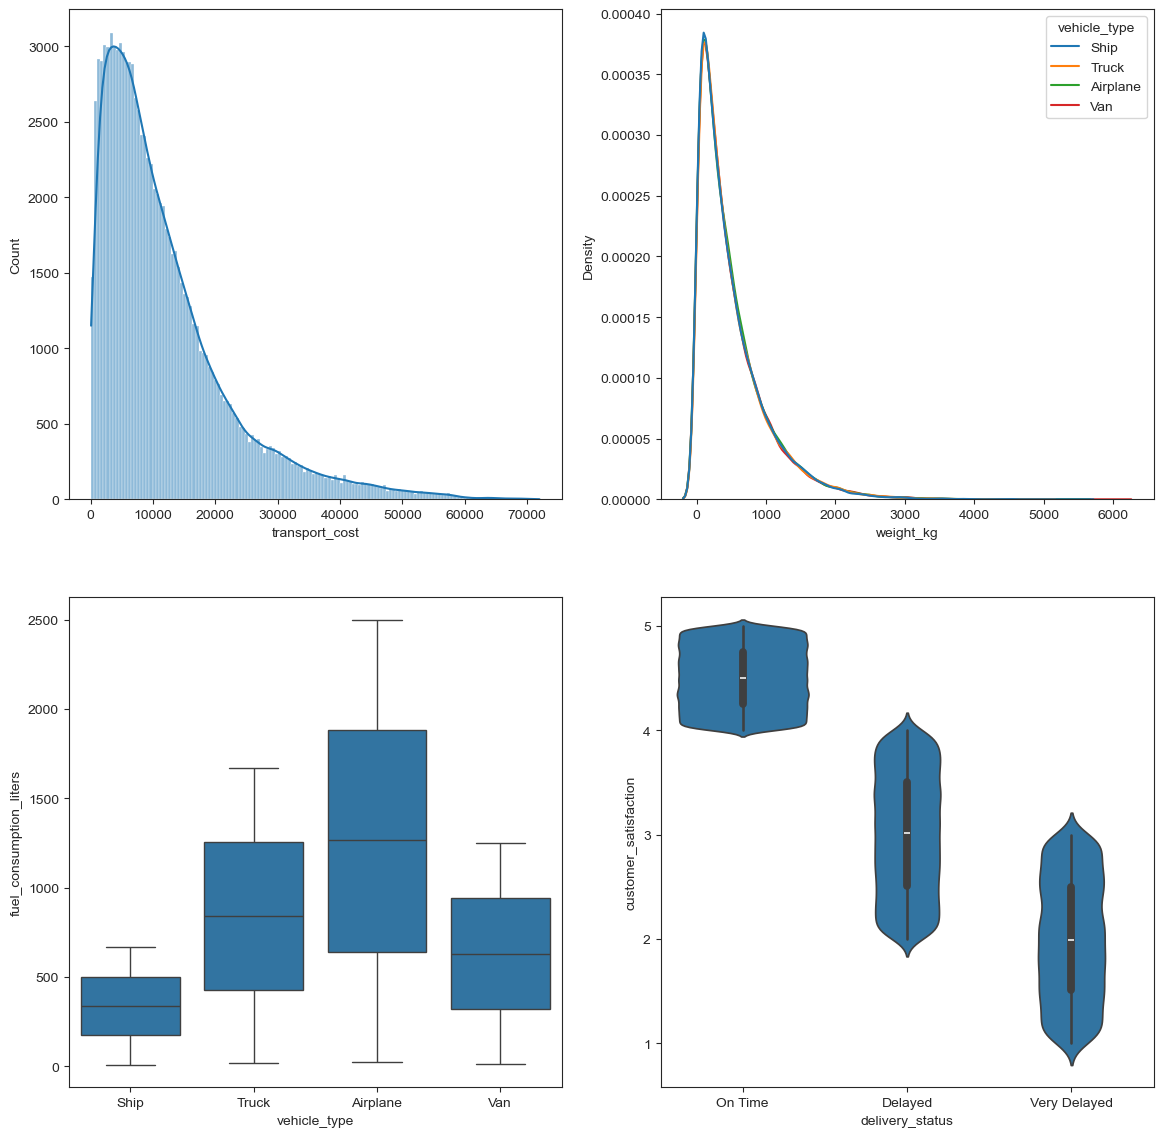

In [52]:
# plt.clf()
fig,axes = plt.subplots(2,2,figsize=(14,14))

sns.histplot(x='transport_cost', data=df, kde=True, ax=axes[0,0])
sns.kdeplot(x='weight_kg', data=df, hue='vehicle_type', ax=axes[0,1])
sns.boxplot(x='vehicle_type', y='fuel_consumption_liters', data=df, ax=axes[1,0])
sns.violinplot(x='delivery_status', y='customer_satisfaction', data=df, ax=axes[1,1])
# histogram, boxplot, kde

plt.show()

### Swarmplot 

C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.9% of the points

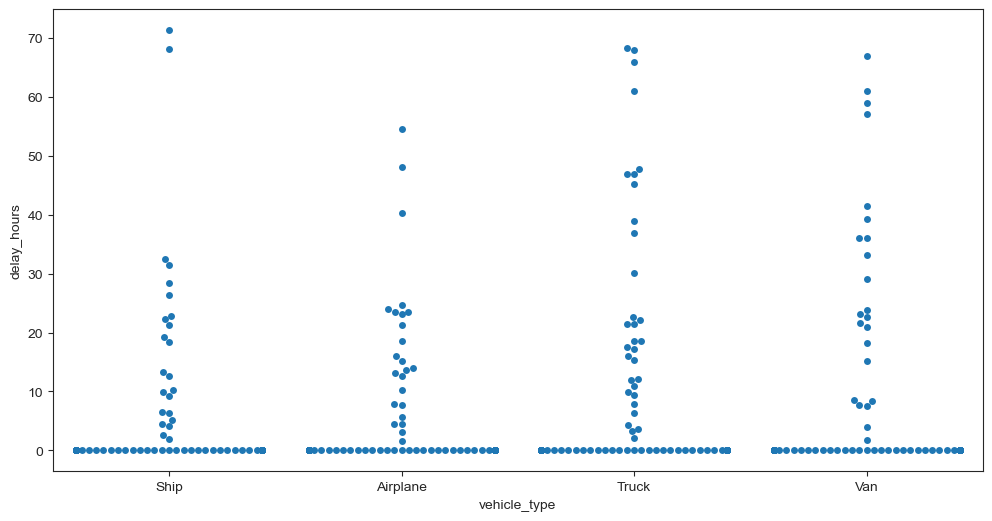

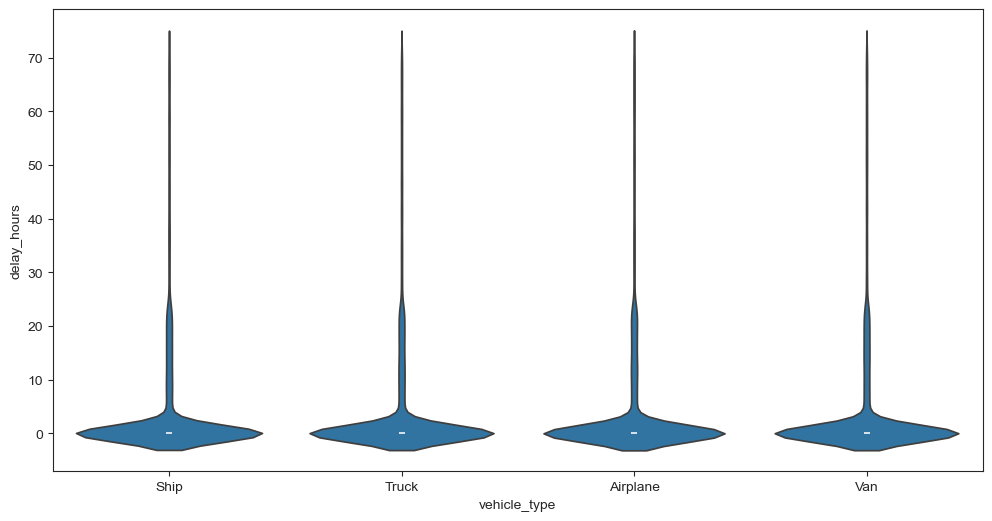

In [54]:
plt.clf()
sns.swarmplot(x='vehicle_type',y='delay_hours', data=df.sample(500))
plt.show()
sns.violinplot(x='vehicle_type',y='delay_hours',data=df)
plt.show()

### additional: reclustering

In [66]:
from scipy.cluster.hierarchy import linkage, leaves_list

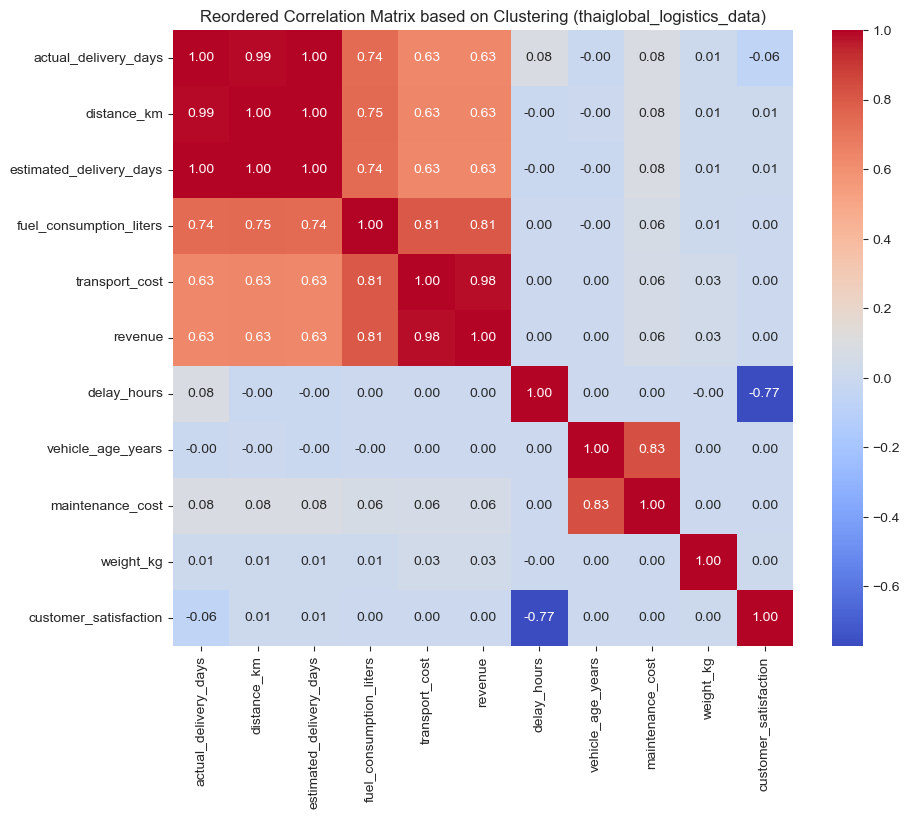

In [61]:
# 1. Calculate the correlation matrix
corr_matrix = df_corr

# 2. Perform hierarchical clustering based on the correlation matrix
linkage_matrix = linkage(corr_matrix, method='average')
order = leaves_list(linkage_matrix)

# Reorder the correlation matrix based on clustering
reordered_corr_matrix = corr_matrix.iloc[order, order]

# 3. Plot the reordered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(reordered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Reordered Correlation Matrix based on Clustering (thaiglobal_logistics_data)')
plt.show()

#### example

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, leaves_list

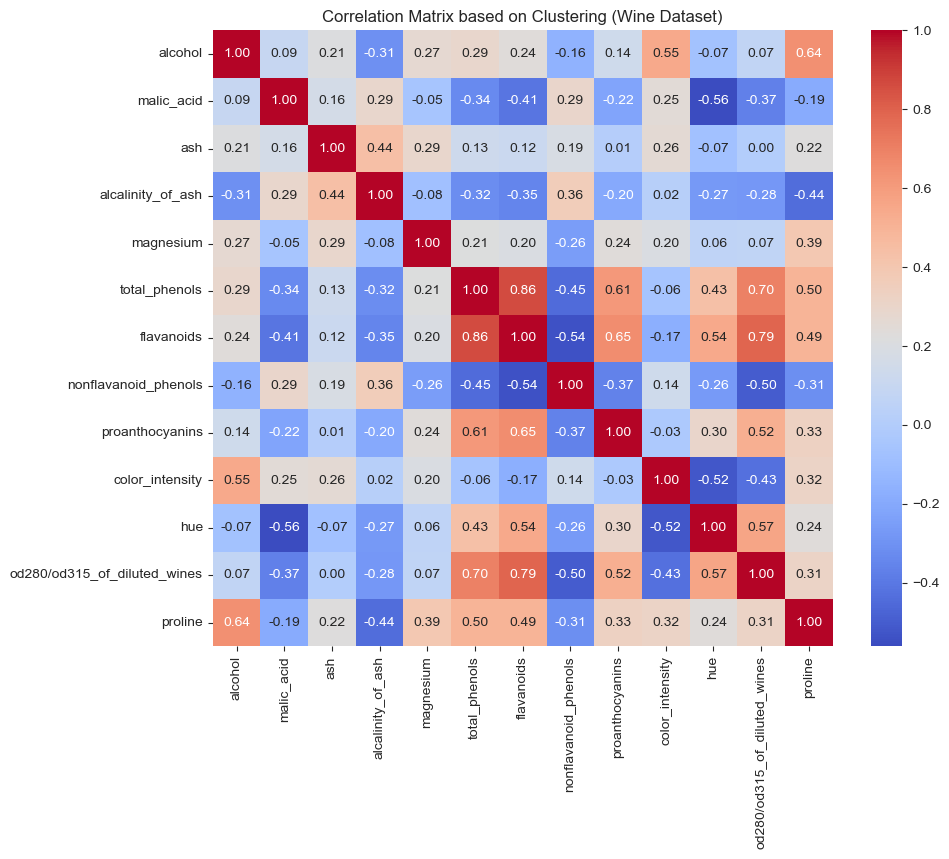

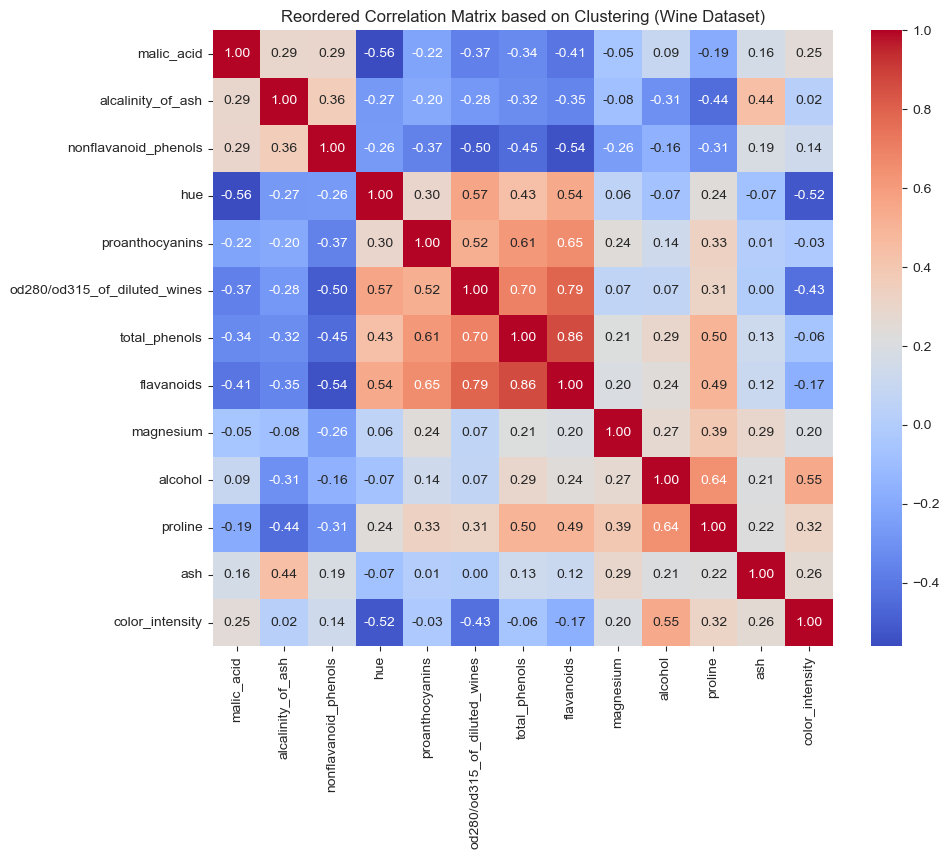

In [57]:
# Load real-world Wine dataset from sklearn
wine_data = load_wine()
data = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# 1. Calculate the correlation matrix
corr_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix based on Clustering (Wine Dataset)')
plt.show()

# 2. Perform hierarchical clustering based on the correlation matrix
linkage_matrix = linkage(corr_matrix, method='average')
order = leaves_list(linkage_matrix)

# Reorder the correlation matrix based on clustering
reordered_corr_matrix = corr_matrix.iloc[order, order]

# 3. Plot the reordered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(reordered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Reordered Correlation Matrix based on Clustering (Wine Dataset)')
plt.show()